# A linear regression learning algorithm example using TensorFlow library.

Linear regression model is one of the simplest regression models. It assumes linear relationship between X and Y. The output equation is defined as follows:
$$\hat{y} = WX + b$$


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
#  Training Parameters
learning_rate = 1e-1
training_epochs = 2000
display_step = 200

200
(200, 1) (200, 1)


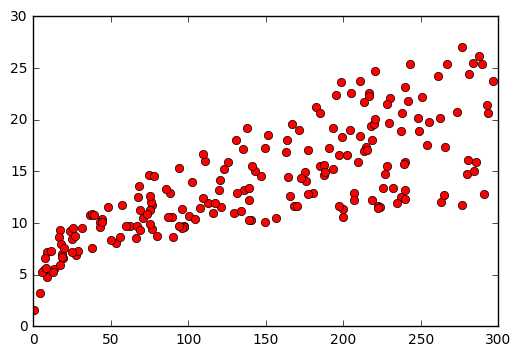

In [7]:
# Load data. Advertising dataset from "An Introduction to Statistical Learning",
# textbook by Gareth James, Robert Tibshirani, and Trevor Hastie 
import numpy as np
data = pd.read_csv('dataset/Advertising.csv',index_col=0)
train_X = data[['TV']].values 

train_Y = data.Sales.values 
train_Y = train_Y[:,np.newaxis]

n_samples = train_X.shape[0]
print n_samples
print train_X.shape, train_Y.shape
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.show()

In [8]:
import tensorflow as tf
# Define tf Graph Inputs
X = tf.placeholder("float",[None,1])
y = tf.placeholder("float",[None,1])

# Create Model variables 
# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.add(tf.mul(X, W), b)

In [9]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(y_pred-y,2))/(2*n_samples) #L2 loss

# Define the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) #Gradient descent

Epoch: 0001 cost= 4988.986328125 W= 0.673232 b= -0.732271
Epoch: 0201 cost= 10.660007477 W= 0.0807558 b= 0.500514
Epoch: 0401 cost= 7.365194321 W= 0.0682943 b= 2.95193
Epoch: 0601 cost= 5.837299824 W= 0.0584317 b= 4.89077
Epoch: 0801 cost= 5.370958328 W= 0.0523762 b= 6.08121
Epoch: 1001 cost= 5.272421837 W= 0.04935 b= 6.6761
Epoch: 1201 cost= 5.257906914 W= 0.0481049 b= 6.92089
Epoch: 1401 cost= 5.256433010 W= 0.0476836 b= 7.0037
Epoch: 1601 cost= 5.256330967 W= 0.0475675 b= 7.02653
Epoch: 1801 cost= 5.256327629 W= 0.0475418 b= 7.03158
Optimization Finished!
cost= 5.25633 W= 0.0475373 b= 7.03246


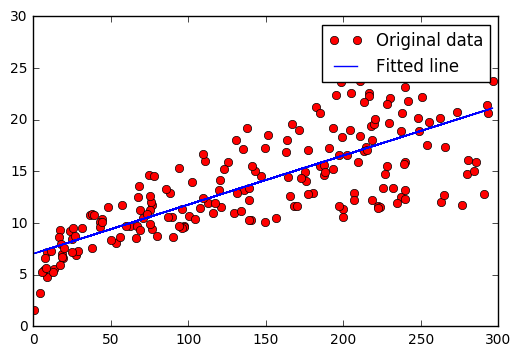

In [10]:
# Initializing the variables
init = tf.initialize_all_variables()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, y: train_Y})       

        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

### Multiple Linear Regression
Let's use three features as input vector : TV,Radio,Newspaper

In [11]:
# Parameters
learning_rate = 1e-2
training_epochs = 2000
display_step = 200

In [12]:
import numpy as np
data = pd.read_csv('dataset/Advertising.csv',index_col=0)
train_X = data[['TV','Radio','Newspaper']].values
train_Y = data.Sales.values 
train_Y = train_Y[:,np.newaxis]
n_samples = train_X.shape[0]
print n_samples
print train_X.shape, train_Y.shape


200
(200, 3) (200, 1)


In [13]:
# Define tf Graph Inputs
X = tf.placeholder("float",[None,3])
y = tf.placeholder("float",[None,1])

# Create Model variables 
# Set model weights
W = tf.Variable(tf.zeros([3, 1]),name="bias")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.matmul(X, W) + b

In [14]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(y_pred-y,2))/(2*n_samples) #L2 loss

# Define the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) #Gradient descent

In [11]:
# Initializing the variables
init = tf.initialize_all_variables()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, y: train_Y})
        
        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)
    

Epoch: 0001 cost= 81.896492004 W= [[ 0.01]
 [ 0.01]
 [ 0.01]] b= 0.00455791
Epoch: 0201 cost= 1.873835087 W= [[ 0.05275722]
 [ 0.21832509]
 [ 0.01449119]] b= 0.370035
Epoch: 0401 cost= 1.719280958 W= [[ 0.0515292 ]
 [ 0.2130571 ]
 [ 0.01177661]] b= 0.821805
Epoch: 0601 cost= 1.586519122 W= [[ 0.05020868]
 [ 0.20743474]
 [ 0.00884137]] b= 1.30685
Epoch: 0801 cost= 1.494102836 W= [[ 0.04898397]
 [ 0.20222305]
 [ 0.00611895]] b= 1.75665
Epoch: 1001 cost= 1.439298749 W= [[ 0.04795504]
 [ 0.19784591]
 [ 0.00383171]] b= 2.13452
Epoch: 1201 cost= 1.411239266 W= [[ 0.04716029]
 [ 0.19446552]
 [ 0.00206499]] b= 2.42638
Epoch: 1401 cost= 1.398829937 W= [[ 0.0465937 ]
 [ 0.19205587]
 [ 0.00080549]] b= 2.63444
Epoch: 1601 cost= 1.394115567 W= [[  4.62212600e-02]
 [  1.90471932e-01]
 [ -2.24505384e-05]] b= 2.77121
Epoch: 1801 cost= 1.392591596 W= [[ 0.0459963 ]
 [ 0.1895152 ]
 [-0.00052252]] b= 2.85382
Optimization Finished!
cost= 1.39218 W= [[ 0.04587253]
 [ 0.18898883]
 [-0.00079767]] b= 2.89927
